In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load in the data

feast=pd.read_csv('data/mr_feast_views.csv')

feast.head()

,video_id,category,views,days_since_release,License,views_change
0,VG916,Reaction,2108373.0,27,NaN,2108373.0
1,VG916,Reaction,2108373.0,27,NaN,2108373.0
2,VG916,Reaction,2543481.0,28,NaN,435108.0
3,VG916,Reaction,3084828.0,29,NaN,541347.0
4,VG916,Reaction,3784331.0,30,NaN,699503.0


# Inspect and clean the data

In [3]:
# Inspect the data

feast.shape

(396, 6)

In [4]:
feast.duplicated().sum()

39

In [5]:
feast.isna().sum()

video_id                0
category                0
views                   0
days_since_release      0
License               396
views_change            0
dtype: int64

In [6]:
# drop License column

feast.drop('License',axis=1,inplace=True)

In [7]:
# drop duplicates

feast.drop_duplicates(inplace=True)

In [8]:
feast.shape

(357, 5)

# Explore the summary statistics and distribution for each video category on their mean daily views

In [25]:
# In this dataset the views column is cumulative
# If we want to look at views per day, we need to look at views_change

# Calculate mean daily views

feast.groupby('category')[['views_change']].mean()

,views_change
category,
Advert,3900.363636
Challenge,659760.444444
Reaction,498177.147783
Vlog,125602.428571


In [10]:
# Calculate max views

feast.groupby('category')[['views_change']].max()

,views_change
category,
Advert,27082.0
Challenge,2355802.0
Reaction,2295875.0
Vlog,813641.0


In [11]:
# Calculate median daily views

feast.groupby('category')[['views_change']].median()

,views_change
category,
Advert,393.0
Challenge,590523.0
Reaction,361904.0
Vlog,39825.0


In [12]:
# Calculate std daily views

feast.groupby('category')[['views_change']].std()

,views_change
category,
Advert,8690.569093
Challenge,695632.548171
Reaction,601057.880954
Vlog,249437.979269


In [13]:
# Instead of calculating each measure indivisually, we can use .agg to include multiple:

feast.groupby('category')[['views_change']].agg(['mean','max','median','std'])

views_change                                    
                    mean        max    median            std
category                                                    
Advert       3900.363636    27082.0     393.0    8690.569093
Challenge  659760.444444  2355802.0  590523.0  695632.548171
Reaction   498177.147783  2295875.0  361904.0  601057.880954
Vlog       125602.428571   813641.0   39825.0  249437.979269

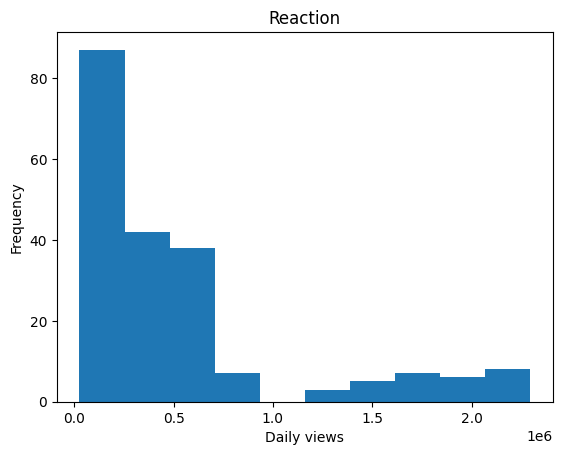

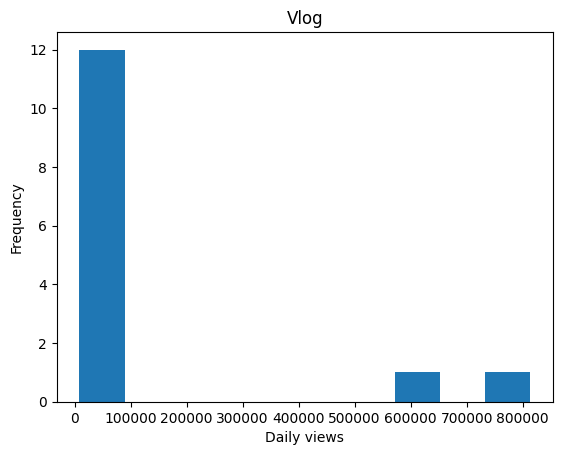

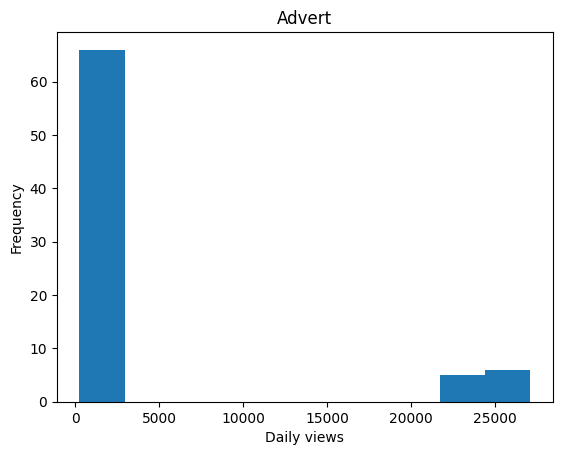

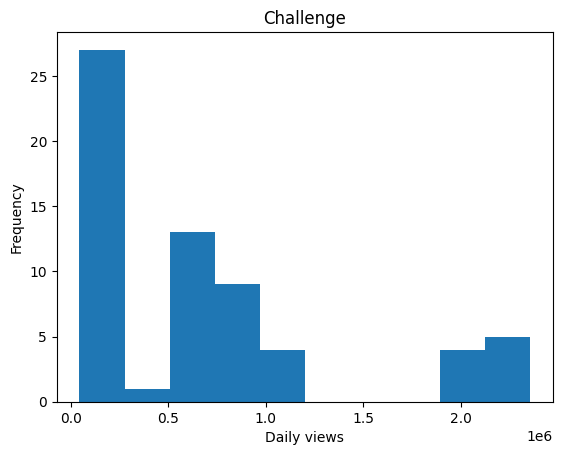

In [14]:
# distribution

for cat in feast.category.unique():
    subset=feast[feast.category==cat]
    subset['views_change'].hist(grid=False)
    plt.xlabel('Daily views')
    plt.ylabel('Frequency')
    plt.title(cat)
    plt.show()

# Hypothesis Test

Mr Feast claims that only 15% of his videos fail to make 1000000 views after 14 days. Test his claim at the 5% level.

In [15]:
# Investigate how many videos after 14 days fail to make 1 million views

# First, select rows where the days_since_release is 14
fourteen_days=feast[feast.days_since_release==14]

number_distinct_videos = fourteen_days['video_id'].nunique()

print(number_distinct_videos)
fourteen_days

16


,video_id,category,views,days_since_release,views_change
25,LL832,Reaction,3388124.0,14,593857.0
37,OD453,Vlog,813641.0,14,813641.0
111,FQ798,Advert,23772.0,14,269.0
122,MZ786,Advert,24024.0,14,448.0
126,CT573,Reaction,1731337.0,14,291558.0
138,NJ501,Reaction,4199030.0,14,48928.0
148,ZB519,Advert,28555.0,14,329.0
152,LA865,Challenge,3174630.0,14,702792.0
179,FV643,Reaction,2025703.0,14,2025703.0
204,AK102,Advert,26646.0,14,352.0


In [16]:
# Number of videos with <1  million views

num_vids_less_than_1mill_views = len(fourteen_days[fourteen_days['views'] < 1_000_000])
print(num_vids_less_than_1mill_views)

5


In [17]:
# We have data on 16 videos at their 14 day mark with 5 failing to meet the 1 million view mark 

print(num_vids_less_than_1mill_views / number_distinct_videos)

0.3125


This sample shows that the proportion is actually 31.25%, but is this sufficient evidence to reject Mr Feast's claim?

Null Hypothesis: Probability of a video failing to reach 1 million views after 14 days =0.15<br>
Alternate Hypothesis: Probability is greater (one tail test)

Test at 5% level

<i>Reminder</i>: With binom test we need to provide 4 inputs:

<ol>
    <li><b>x</b>: The number of successes</li>
    <li><b>n</b>: The number of trials</li>
    <li><b>p</b>: Probability of success (under the null hypothesis</li>
    <li><b>alternative</b>: One or two tailed test</li>
</ol>

In [18]:
from scipy.stats import binom_test

binom_test(5,16, p=0.15, alternative='greater')

/var/folders/z3/32459rgx5g353dlhbq3hx87m0000gp/T/ipykernel_55413/4290300246.py:3: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(5,16, p=0.15, alternative='greater')


0.07905129836694304

The p-value if 0.079, or 7.9%. As a reminder the p-value is the probability that results as extreme as the observed results might occur, assuming the null hypothesis is true.

In the context of this example:

Under the null hypothesis, the probability that at least 5/16 (31.25%) videos failing to reach 1 million views after 14 days is 7.9%. Although this is low, it is above 5% meaning we do not have enough evidence to doubt Mr Feast's claim.

<b>BUT</b>, what if Mr Feast's sample size had been bigger. Say it was 50 out of 160 videos...

In [19]:
binom_test(x=50, n=160, p=0.15, alternative='greater') 

/var/folders/z3/32459rgx5g353dlhbq3hx87m0000gp/T/ipykernel_55413/3937423056.py:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(x=50, n=160, p=0.15, alternative='greater')


1.7134618925220467e-07

Under the null hypothesis, the probability that at least 50/160 (31.25%) videos failing to reach 1 million views after 14 days is 0.000017%, much lower than 5%, meaning we have sufficient evidence to doubt Mr Feast's claim.

A hypothesis test is affected by the size of the data provided. Binomial tests should only be used with up to 50 data points, beyond that we should use something else. 

When conducting a hypothesis test, be aware that changing the size of the dataset will have an affecdt on the outcome.

## Practice

In [20]:
#1 Calculate the standard deviation of the days_since_released column for each category. 



In [21]:
#2: What is the distribution of views_change for reaction videos that are older than 10 days?



In [22]:
#3: What proportion of videos are adverts?



In [23]:
#4: Mr Feast has claimed that only 10% of his videos are adverts. Test at the 5% level if this is true.
